<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [16]:
#import sklearn confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# import labelencoder

from sklearn.preprocessing import LabelEncoder

In [6]:
# compute dummy variable for diagnosis column

le = LabelEncoder()
cancer['diagnosis_le']=le.fit_transform(cancer['diagnosis'])

In [7]:
# computer predictor and label

X = cancer.drop(['id','diagnosis','Unnamed: 32'], axis=1)
y = cancer.diagnosis_le

In [8]:
# import train test split 

from sklearn.model_selection import train_test_split

In [9]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [10]:
# import logistic regression

from sklearn.linear_model import LogisticRegression

In [12]:
# initiate and fit data

logreg = LogisticRegression(random_state=1).fit(X_train,y_train)

In [14]:
y_pred_lr = logreg.predict(X_test)

In [17]:
# fit the data

conf_mat_lr =confusion_matrix(y_test, y_pred_lr)
report_lr =classification_report(y_test, y_pred_lr)
conf_mat_lr 

array([[107,   0],
       [  1,  63]], dtype=int64)

In [19]:
print('Classification report_lr: \n',report_lr)

Classification report_lr: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [35]:
# import svm

from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import classification_report

In [36]:
cl_svm = SVC(kernel='rbf',probability=True)
cl_svm.fit(X_train,y_train)


SVC(probability=True)

In [37]:
y_test_svm = cl_svm.decision_function(X_test) 

In [38]:
y_pred_svm = cl_svm.predict(X_test)

In [39]:
# fit the data

conf_mat_svm =confusion_matrix(y_test, y_pred_svm)
report_svm =classification_report(y_test, y_pred_svm)
conf_mat_svm 

array([[106,   1],
       [ 14,  50]], dtype=int64)

In [40]:
print('Classification report for svm: \n',report_svm)

Classification report for svm: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       107
           1       0.98      0.78      0.87        64

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [41]:
# import NB

from sklearn.naive_bayes import GaussianNB

In [42]:
cl_nb = GaussianNB()
cl_nb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred_nb = cl_nb.predict(X_test)

In [46]:
conf_mat_nb =confusion_matrix(y_test, y_pred_nb)
report_nb =classification_report(y_test, y_pred_nb)
conf_mat_nb 

array([[107,   0],
       [  0,  64]], dtype=int64)

In [48]:
print('Classification report for NB: \n',report_nb)

Classification report for NB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        64

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [49]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
gs_logreg = GridSearchCV(logreg, lr_params)
gs_logreg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [52]:
sorted(gs_logreg.cv_results_.items())

[('mean_fit_time',
  array([0.00039916, 0.02153578, 0.0009975 , 0.02074432, 0.0001996 ,
         0.02074471])),
 ('mean_score_time',
  array([0.        , 0.00139656, 0.        , 0.00179543, 0.        ,
         0.00119677])),
 ('mean_test_score',
  array([       nan, 0.98490506,        nan, 0.99493671,        nan,
         0.97996835])),
 ('param_C',
  masked_array(data=[1, 1, 10, 10, 100, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object)),
 ('param_penalty',
  masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object)),
 ('params',
  [{'C': 1, 'penalty': 'l1'},
   {'C': 1, 'penalty': 'l2'},
   {'C': 10, 'penalty': 'l1'},
   {'C': 10, 'penalty': 'l2'},
   {'C': 100, 'penalty': 'l1'},
   {'C': 100, 'penalty': 'l2'}]),
 ('rank_test_score', array([4, 2, 5, 1, 6, 3])),
 ('split0_test_score',
  array([   na

In [53]:
print('Best Score: %s' % gs_logreg.best_score_)
print('Best Hyperparameters: %s' % gs_logreg.best_params_)

Best Score: 0.9949367088607595
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [54]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [220]:
# bm_map = {
#     'B': 0,
#     'M': 1
# }

# cancer['diagnosis']=cancer['diagnosis'].map(bm_map)

In [283]:
gs_svm = GridSearchCV(cl_svm, svc_params)
gs_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [284]:
sorted(gs_svm.cv_results_.items())

[('mean_fit_time',
  array([7.92429171, 0.03111768, 8.33795338, 0.01417289, 7.50928402,
         0.03211846, 8.00718307, 0.01368136, 7.96758218, 0.03181524,
         8.51673117, 0.01496434])),
 ('mean_score_time',
  array([0.00139184, 0.00319176, 0.00159612, 0.00179019, 0.00198979,
         0.00219493, 0.00180106, 0.00178442, 0.00180149, 0.00198984,
         0.00160136, 0.00199604])),
 ('mean_test_score',
  array([1.        , 0.91702532, 1.        , 0.93468354, 1.        ,
         0.91712025, 1.        , 0.93724684, 1.        , 0.91712025,
         1.        , 0.94724684])),
 ('param_C',
  masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10, 100, 100, 100, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object)),
 ('param_gamma',
  masked_array(data=[0.001, 0.001, 0.0001, 0.0001, 0.001, 0.001, 0.0001,
                     0.0001, 0.001, 0.001, 0.0001, 0.0001],
  

In [287]:
print('Best Score: %s' % gs_svm.best_score_)
print('Best Hyperparameters: %s' % gs_svm.best_params_)

Best Score: 1.0
Best Hyperparameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [177]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

### ROC curve for Logistic Regresssion

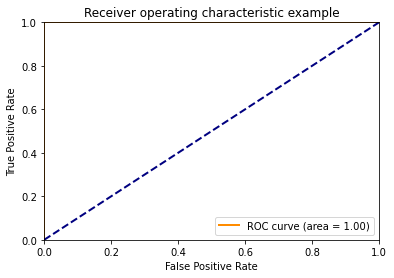

In [179]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
y_preds_lr_proba = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, thresholds  = roc_curve(y_test, y_preds_lr_proba)


# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_preds_lr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### ROC curve with SVM

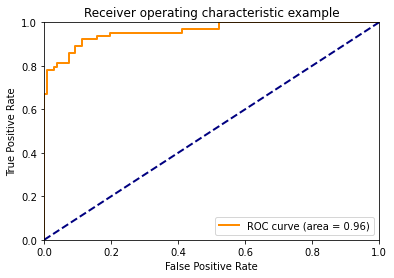

In [212]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict

y_preds_svm_proba = cl_svm.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, thresholds  = roc_curve(y_test, y_preds_svm_proba)


# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_svm)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### ROC curve with Naive Bayes

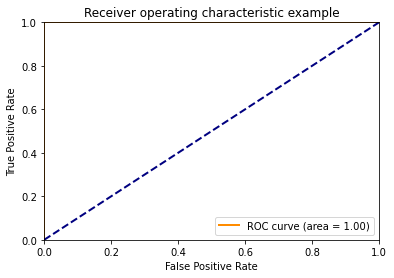

In [213]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict

y_preds_nb_proba = cl_nb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, thresholds  = roc_curve(y_test, y_preds_nb_proba)


# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_nb)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

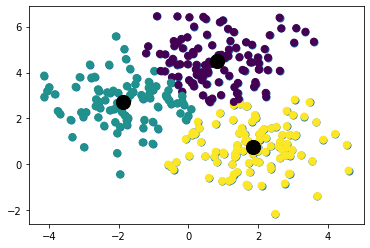

In [217]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=1.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

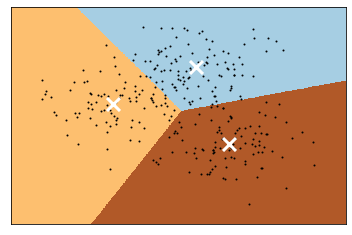

In [218]:
#Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



